In [1]:
pip install opencv-python numpy matplotlib scikit-image tensorflow keras

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology
from tensorflow.keras.models import load_model

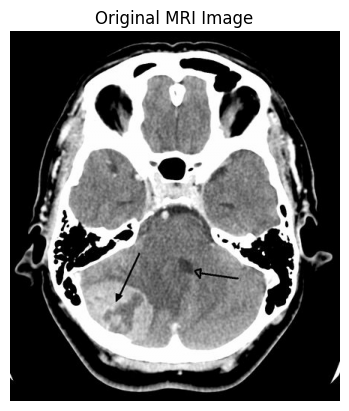

In [4]:
# Load the MRI image in grayscale
image = cv2.imread("/content/tumour.jpg", cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# You should also display the image using plt.imshow before setting the title and showing the plot.
plt.imshow(image, cmap='gray') # Add this line to display the image
plt.title("Original MRI Image")
plt.axis("off")  # Hide axis for better visualization
plt.show()

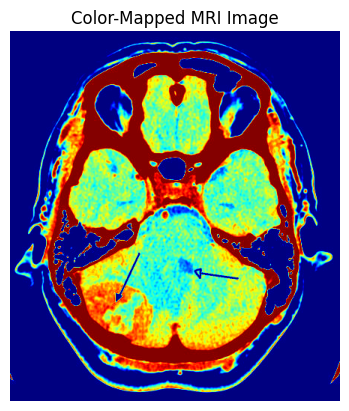

In [6]:
# Apply a color map (e.g., COLORMAP_JET for better visualization)
color_mapped_image = cv2.applyColorMap(image, cv2.COLORMAP_JET)

# Display the color-mapped image
plt.imshow(cv2.cvtColor(color_mapped_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Color-Mapped MRI Image")
plt.axis("off")
plt.show()

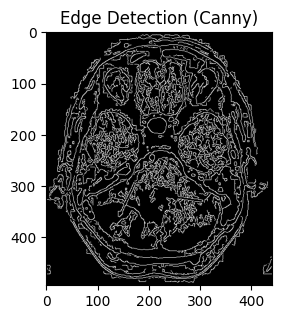

In [7]:
# Function to preprocess MRI image
def preprocess_image(image_path):
    import cv2 # Import cv2 within the function
    image = cv2.imread("/content/tumour.jpg", cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    image = cv2.equalizeHist(image)  # Enhance contrast
    return image

# Function to detect edges using Canny Edge Detection
def detect_edges(image_path):
    import cv2 # Import cv2 within the function
    image = preprocess_image(image_path)

    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1=50, threshold2=150)

    return image, edges

# Function to visualize results
def visualize_results(image_path):
    import matplotlib.pyplot as plt # Import matplotlib.pyplot here
    original_image, edge_detected_image = detect_edges(image_path)


    plt.subplot(1, 2, 2)
    plt.title("Edge Detection (Canny)")
    plt.imshow(edge_detected_image, cmap="gray")

    plt.show()

# Example usage
image_path = "/content/tumour.jpg"  # Replace with actual MRI image path
visualize_results(image_path)

Edge detection test passed successfully!


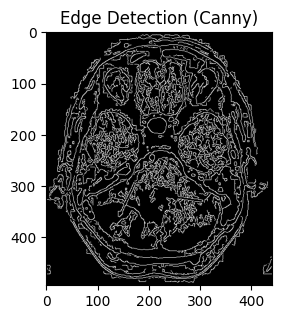

In [8]:
# Function to preprocess MRI image
def preprocess_image(image_path):
    import cv2  # Import cv2 inside the function
    image = cv2.imread("/content/tumour.jpg", cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    image = cv2.equalizeHist(image)  # Enhance contrast
    return image

# Function to detect edges using Canny Edge Detection
def detect_edges(image_path):
    import cv2  # Import cv2 inside the function
    image = preprocess_image(image_path)

    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1=50, threshold2=150)

    return image, edges

# Function to test edge detection
def test_edge_detection(image_path):
    original_image, edge_detected_image = detect_edges(image_path)

    # Check if the output is a valid image
    assert original_image is not None, "Error: Original image not loaded correctly."
    assert edge_detected_image is not None, "Error: Edge detection failed."

    # Check if the edge-detected image has the same dimensions as the original
    assert original_image.shape == edge_detected_image.shape, "Error: Image dimensions mismatch."

    print("Edge detection test passed successfully!")

    import matplotlib.pyplot as plt  # Import matplotlib.pyplot inside the function

    plt.subplot(1, 2, 2)
    plt.title("Edge Detection (Canny)")
    plt.imshow(edge_detected_image, cmap="gray")

    plt.show()

# Example usage
image_path = "/content/tumour.jpg"  # Replace with actual MRI image path
test_edge_detection(image_path)

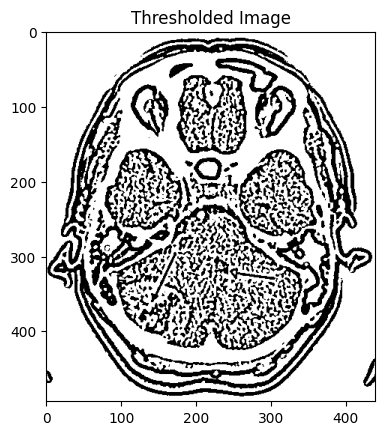

In [9]:
import cv2  # Make sure cv2 is imported
import matplotlib.pyplot as plt # and matplotlib

# Load the image here before using it
image = cv2.imread("/content/tumour.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5,5), 0)

# Apply Adaptive Thresholding for better segmentation
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(thresh, cmap="gray")
plt.title("Thresholded Image")
plt.show()

In [10]:
import numpy as np  # Import numpy and assign it to the alias 'np'

# Define a kernel for morphological operations
kernel = np.ones((5,5), np.uint8)

In [11]:
# Erosion (Removes small white noise)
eroded = cv2.erode(thresh, kernel, iterations=1)

# Dilation (Expands white regions)
dilated = cv2.dilate(thresh, kernel, iterations=1)

# Opening (Erosion followed by Dilation - removes noise)
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Closing (Dilation followed by Erosion - fills gaps)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

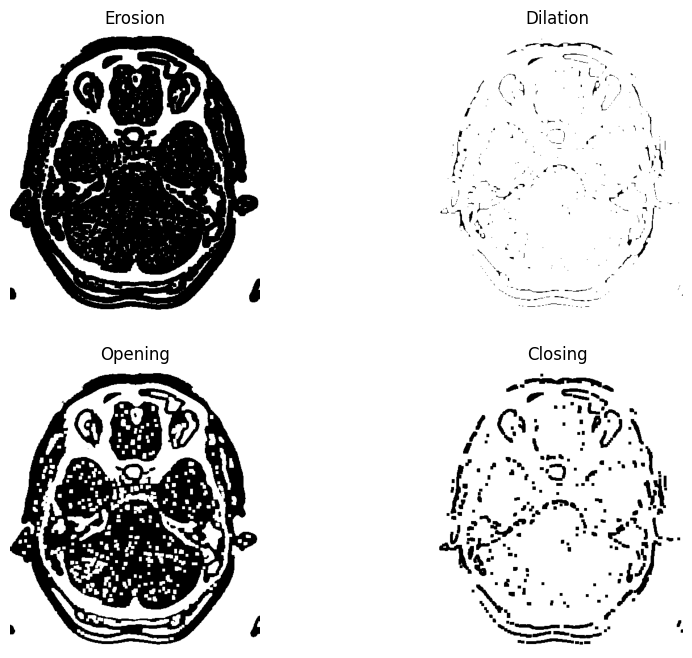

In [12]:
# Display all transformations
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].imshow(eroded, cmap="gray")
axs[0, 0].set_title("Erosion")

axs[0, 1].imshow(dilated, cmap="gray")
axs[0, 1].set_title("Dilation")

axs[1, 0].imshow(opened, cmap="gray")
axs[1, 0].set_title("Opening")

axs[1, 1].imshow(closed, cmap="gray")
axs[1, 1].set_title("Closing")

for ax in axs.flat:
    ax.axis("off")

plt.show()

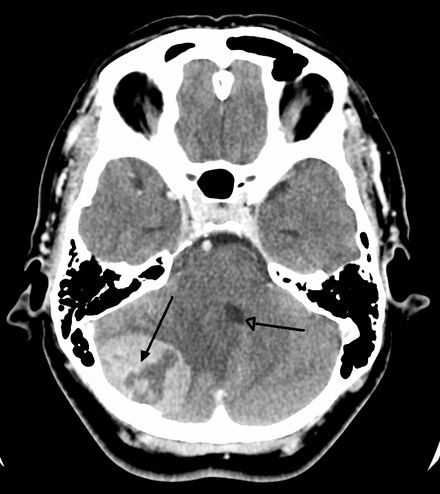

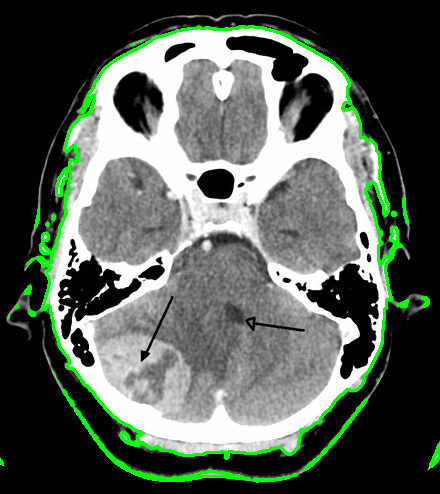

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

def detect_contours(image_path):
    """Load an image and detect contours."""
    image = cv2.imread("/content/tumour.jpg", cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    _, thresholded = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)  # Apply thresholding

    # Find contours
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for color display
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Draw contours in green

    return contour_image

def main(image_path):
    """Main function to process and display contour detection."""
    contour_image = detect_contours(image_path)

    # Display results using cv2_imshow instead of cv2.imshow
    cv2_imshow(cv2.imread("/content/tumour.jpg"))  # Display original image
    cv2_imshow(contour_image)  # Display contour image

# Example usage
image_path = "/content/tumour.jpg"  # Replace with the actual MRI image path
main(image_path)